# COGS 118A- Project Proposal

# Names


- Luke Skerrett
- Luke Mitbo
- Justin Ubamadu
- Josh Salce

# Abstract

Our goal is to use baseball players' stats during their first years in the league to predict their future abitrated salaries. We will be using two datasets, one containing information about players' past salary information, and one with information about the players' stats. We will be using this data to train a regression model that predicts the arbitrated salary of players. Performance will be measured using Mean Average Error. 

# Background 
Salary arbitration is the final solution to a contract dispute between a team and a player. The first major contract dispute that sparked the change was in 1969 [1.]. In 1969, players were bound to teams by the reserve clause, which essentially restricted a player from ever playing for a different MLB team unless he was cut or traded. Curt Flood sued the MLB and even though it cost him his career, it generated the moment that would eventually create the arbitration period.

Salary Arbitration was originally created in the winter of 1973-1974[2.], when MLB owners approved the plan for salary arbitration. It went into place that offseason for players with at least two years of MLB service time.

The most important part of our prior research is to establish what an arbitrated salary is. An arbitrated salary is a special one-year salary that can be applied to a player inbetween his 3rd and 6th year of MLB service time (Time spent on the "active" roster or Injury Reserve). There are also an exception for particular exceptional individuals who are able to arbitrate their salary midway through their second year of MLB service time. This exception is created when a player who has more than 2 years of MLB service-time but less than 3-years is in the top 22% of the league in service time, it is commonly referred to as a "Super-Two" player.

If a player fits the criteria for salary arbitration and the team they are on cannot come to an agreement as to what their next contract should be, then both the team and the player will each write down the number they feel is adequate compensation, and submit it to a panel of arbitors. The arbitors will then judge the player based on a number of factors, for example: 

a. Their performance and leadership qualities, 

b. The team's win-loss record, 

c. Notable accomplishments for the player, and 

d. Salary comarpisons to peers in the same service-time class. 

At the end of the arbitration, the panel will pick one of the two numbers and that will be the players salary. The only way out for the team is if they release the player or trade them. Furthermore this contract is strictly a one-year, non-guarantee contract. Therefore they must decide on a new deal before the next arbitration window occurs, otherwise they have to do this again.

The difficult part of arbitration, is that both the team and the player must select a number that they think is beneficial from their own point-of-view, while also not going too far to either of the extremes, otherwise their salary choice is unlikely to get picked. It's very risky for both parties, as only one side will get what they want in the end. A player might end up with a terrible low-end contract, or a team could end up paying a star players salary for someone that they feel is more of a role player. Meaning having an accurate estimate of what the result of an arbitration hearing would be extremely helpful, to determine whether a party wants to try their luck, or not.

Similar to how Sport Journalists have Free Agency trackers and predictions for where talent will end up, MLB analysts create models to project the salaries for arbitration eligible players[3.]. It's difficult to tell if some of these are good models as we can't see the underlying factors that generate the model, but they are good examples to go off and can give us a better analysis of our predictor data.

# Problem Statement
Arbitration is difficult when discussing baseball salaries. We aim to acccess the problem of calculating just how much money young Major League Baseball players are worth when they are ready for their next contract. 

Throughout the years, players and teams alike have had disagreements surrounding how much the player is worth based on their performance stats and other contributing factors, including position and age. 

Agents and their respective players will argue X player is worth more because he produced Y homeruns, yet clubs will argue X player is worth less because he contributed Z errors. It is a back-and-forth argument, otherwise known as Pendulum Arbitration, because the tension swings similar to a pendulum. 

In any case, baseball is a sport with no shortage of stats, so we hope we can create a machine learning system that utilizes said stats and can accurately predict a player's salary via their impact. 


# Data 


We will be using several different datasets, including  arbitration salaries and player statistics from for training, as well as 2022 player statistics to predict arbitration salaries for the 2023 season. We will then compare our predictions with the agreed 2023 arbitration salaries for all players we predict on.

## Dataset 1
* Name: MLB-Arbitration 2018-23.xls
* Link: https://docs.google.com/spreadsheets/d/1qxfZP9F05K7mIO4Kwv5D6hEbvtmAutIc807GSfoCQ1A/edit#gid=55083470
* Number of Observations (Total): 1143
* Number of Variables: 11-12
* Each observation consists of player data, including the player's name, service time (numerical category), season, team (category), position (category), previous year salary, current year salary, salaries offered by the player and team during arbitration (most blank due to no arbitration hearing), as well as an estimate of salary arrived at by the keepers of this data through a propreitary algorithm
* Some cleaning will be needed to arrive at our features of interest, including season, position, and salary, as well as to standardize some column values so that other datasets can be combined.

Note: If data quantity becomes an issue, additional data from years past will be collected and stored by hand in a dataset similar to the one described above. 

## Dataset 2
* Name: Fangraphs Major League Leaderboards
* Link: TBD
* Each observation contains in-game statistics for position players (offense and defense), as well as pitchers. Those statistics represented in the dataset are available to be custom-made, meaning we will be doing some feature selection once we have determiend a set of variables to use in our data that will ultimately be trained on by our model.
* Number of Variables and Observations: TBD
* Important: As with our arbitration data, position will need to be transformed to be one-hot encoded, as player salaries can vary greatly by position. Also, all numerical stats that will be inputs in our model will have to be scaled through sklearn StandardScaler() objects.

* Note: If expanding data beyond the year 2018, data collection issues will not be as difficult to handle as arbitration data


Fangraphs Major League Leaderboards is a dataset that contains the statistics for MLB players. There are numerous statistics to use in this dataset, which we will choose to implement in our model at a later date. For now, some possible variables we may choose to use include (not an exhaustive list):

* Position Players
  * Batting Average (AVG)
  * Isolated Power (ISO), a ratio of hits that go for more than one base
  * Weighted On Base Average (wOBA), weighted average rate statistic for all ways of reaching base (i.e. hits, walks, hit-by-pitch)
  * Percentage of balls hit at 95 mph or greater (Hard-Hit%)
  * Percentage of batted balls hit 95 mph or higher, angling between 26 to 30 degrees (Barrel%)
  * Defensive Runs Saved (DRS), number of potential runs prevented by a player on defense

* Pitchers
  * Strikeout Minus Walk Percentage (K%-BB%)
  * Fielding Independent Pitching (FIP), a measure attempting to estimate performance based on home runs, strikeouts, and walks
  * Earned Run Average (ERA), (Earned Runs / Innings Pitched) * 9
  * Swinging-strike percentage (SwStr%)
  * Percentage of balls batted at 95 mph or greater (Hard-Hit%)

# Proposed Solution 
Our solution to the problem will be designing and training a polynomial regression model that takes in the important features of players and outputs the predicted arbitrated salary. In order to select the important features, we will be applying L1 penalization on the weights and Principle Component Analysis to combine features that have similar effects. Once our data is cleaned, we will use cross validation to select the correct hyperparameters for our model, such as step size, weight penalty coefficients, polynomial degree for different features, etc. Our solution will be tested using a subset of the data exclusively used for testing and evaluated using the below evaluation metrics.

# Evaluation Metrics

Given the scope of our project and the problem we are trying to address, we propose using mean-absolute error, or MAE, as our primary evaluation metric. This metric is calculated over all datapoints, with each datapoint's predicted y-value subtracted from the datapoint's true y-value (i.e. "residuals") from the data summed over and divided by the number of datapoints. 

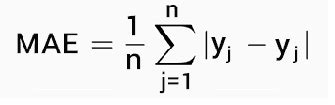

We prefer MAE over different metrics such as mean-squared error (MSE), which takes the sum of squared residuals over the number of datapoints. MAE will be more robust to players who qualify as outliers and are predicted to have larger salaries relative to the rest of the cohort, as the possibly large difference between a fitted model's predicted value and true value would be less influential in the total error of the model. On the other hand, MSE would give less optimistic estimations of model performance from the difference between an outlier salary and its prediction being squared. More practically, however, MAE would also be preferred given that the intended units of the model's input and output includes dollars. It would be easier to interpret a model applied to this specific problem and its performance in terms of absolute error of allocated money, instead of the square of residual money error.

# Ethics & Privacy

Our project's discussion of ethics begin with the problem we are attempting to address. We first recognize that assigning monetary value based on an athlete's performance in a specific game with specific rules and regulations is prima facie a difficult task. On the other hand, we must also recognize that exploring such a question is permissible in the first place due to the consent that MLB players give when they agree to their contracts to play, which allows for having individual in-game performance measured, collected, and evaluated to negotiate future salaries.

We must also address the ethics pertaining to the data we are using in the first place. Given that the datasets and information gathered to use in our project are all made publicly available to the public through MLB and other organizations, we we find no ethical concerns for using the data that we obtain for our project. Much of this player statistics and news about player salaries has been present for decades in the time period of the Internet, with an increasing demand for more access. Older sources will also be used to gather additonal data from news articles reporting player salaries into a self-created spreadsheet. We will cite any and all datasets used; that way anyone outside of the project is able to view the data we used directly.

One objection that could be raised is that our data should be used  without names or other personally identifiable information (PII) for the sake of privacy to the individual players. We do not find this proposition convincing given that the knowledge about what salary is paid to which player is made publicly available anyways, and the lack of clarity from eliminating PII leads to some obscurity about how well a model can accurately predict salary. Also, MLB players are professional athletes and thus qualify as public figures, making the concern for salary associated to one's name a subpar objection.

We conclude by stating our intentions: to be reasonable in our predictions that indicate just compensation on the part of the player and the team. We suggest that some of the players in arbitration- those that are statistically among the best- may be getting underpaid relative to players under long-term contracts due to their status being under arbitration as opposed to an unrestricted free agent. Therefore, we are equally concerned of arriving at salary predicitions fair that give good estimate of player's salaries, while also being mindful of  the rules of arbitration mentioned in our background section that greatly influence the process and outcomes of salary arbitration. Any discussion about the rules of arbitration and how that may have an unjust impact on specific player's salaries is not within the scope of our project.

# Team Expectations

* Team Expectation 1: All members are to contribute their respective amounts to the project.
* Team Expectation 2: All members are expected to show up to our weekly meetings unless advance notice is given, with an additional expectaion to keep the rest of the group updated on respective assignments over the course of the project.
* Team Expectation 3: All members are to have their assignments done, on time, by pre-determined due dates that correspond to specific meetings.
* Team Expectation 4: All members are encouraged to ask other members for assistance if they are struggling.

All meeting and any other type of communication, such as questions and clarifications, will be done over our iMessage group chat. Meetings regarding project progress will take place at least once a week. Any issues regarding communication or handling of assignments will be handled first privately, with course staff intervening as a last resort.


# Project Timeline Proposal

Replace this with something meaningful that is appropriate for your needs. It doesn't have to be something that fits this format.  It doesn't have to be set in stone... "no battle plan survives contact with the enemy". But you need a battle plan nonetheless, and you need to keep it updated so you understand what you are trying to accomplish, who's responsible for what, and what the expected due dates are for each item.

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/22  |  4 PM |  Proposal Finished  | Determine how to break down the data, have examples of dataset, figure out data cleaning and algorithms, what eval metrics to use | 
| 5/29  |  4 PM |  Data cleaned, algorithms decided, parameters tuned | Discuss implementation | 
| 6/5  | 4 PM  | Have initial implementation done  | Discuss fine tuning and any adjustments 
| 6/12 | 4 PM | Have results from final project, evaluation metrics calculated | Articulate limitations, final results

# Footnotes

[1.]: Kaiser, L (Fall 2004) Revisiting the Impact of the Curt Flood Act of 1998 on the
Bargaining Relationship Between Players and Management in
Major League Baseball. _DePaul Journal of Sports Law._ 
https://via.library.depaul.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1085&context=jslcp#:~:text=The%20Curt%20Flood%20Act%20had,restrictions%20on%20the%20labor%20market

[2.]: Perry, D (8 Feb 2022) MLB lockout: Examining baseball's precedent for arbitration eligibility after two years. _CBS Sports._ 
https://www.cbssports.com/mlb/news/mlb-lockout-examining-baseballs-precedent-for-arbitration-eligibility-after-two-years/#:~:text=In%20the%20winter%20of%201973,years%20of%20MLB%20service%20time.

[3.]: Adams, S (10 Oct 2022) Projected Arbitration Salaries For 2023. _MLBTradeRumors._ https://www.mlbtraderumors.com/2022/10/mlb-projected-arbitration-salaries-2023.html